In [1]:
from dateutil.parser import *
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## About the data

Email is the most valuable marketing channel online retailers can leverage. To give you some perspective, 20% of online sales were driven by email in Q4 2015.

The problem is that most online retailers plan their email strategy without truly understanding the underlying, industry-wide, trends. The lack of publicly available data makes it difficult for marketers to understand these trends.

In this report we explore the email data collected by [MailCharts](https://www.mailcharts.com) over the course of 2016 to understand what's happening in the email space. We will focus on three key questions:

1. Are companies becoming more user-centric by dropping the notion of a `no-reply` email address?
1. Are companies embracing mobile and optimizing their emails accordingly?
1. Are companies trying to become more personable by using GIFs?

Let's begin by loading our data.

In [2]:
# Since the data is over 100MB, it can't be uploaded to GitHub.
# Download the data from here: https://cl.ly/2Q0F3I2s1r0Y and save it in the data folder.
df = pd.read_csv('./data/mc-2016.csv')

## Understanding the data 

In [3]:
print("Our dataset contains {} data points.".format(len(df)))

print("\nAs a reference, here's how our data is modeled:")
print(df.ix[0,:])

Our dataset contains 573198 data points.

As a reference, here's how our data is modeled:
company_id                                                        578
guid                             8564454b-f39e-c1bf-45b1-5166bf8bdb10
subject                                               My M&M's & More
from                [{"address":"noreply@r.groupon.com","name":"Gr...
reply_to                                                          NaN
mobile_optimized                                                    t
sent_at                                           2016-06-12 20:17:25
animated                                                            f
body_bytes                                                      53936
image_bytes                                                    175079
Name: 0, dtype: object


In [16]:
# Let's add a column to our data frame called 'month' where we'll save the month when the email was received.
# This will allows us to see how our data is trending as we aim to answer the three questions we're focused on.
df['month'] = df['sent_at'].map(lambda x: x.split('-')[1])

month
01    38801
02    37443
03    40575
04    39494
05    41034
06    41847
07    52650
08    54299
09    50600
10    52727
11    60636
12    63092
dtype: int64


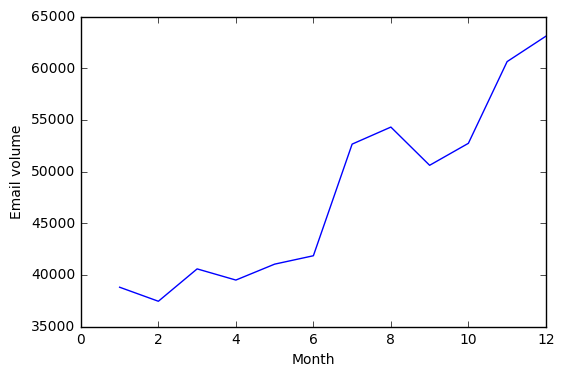

In [5]:
# Before diving into the analysis, let's look at email volume for 2016.
email_volume_by_month = df.groupby(['month']).size()
print(email_volume_by_month)

plt.plot(email_volume_by_month)
plt.ylabel('Email volume')
plt.xlabel('Month')
plt.show()

As we can see, email volume increases throughout the year. This is because new companies were added to MailCharts as the year went on. In order to assume a fair comparison, we'll need to look at **rates** instead of just looking at **email volume**.

month
01    2118
02    2133
03    2207
04    2267
05    2329
06    2508
07    3051
08    2994
09    3036
10    3118
11    3207
12    3768
Name: company_id, dtype: int64

Our data set grew by 77.9%


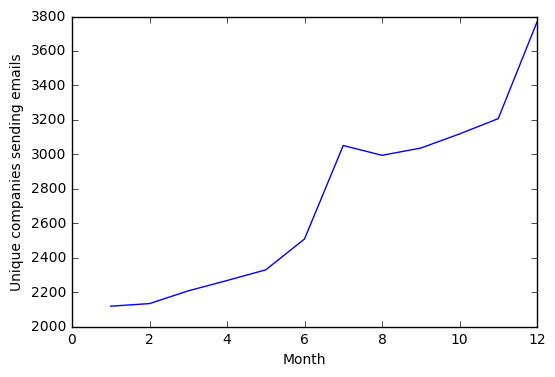

In [32]:
# Let's see how many unique companies sent an email each month.
# This gives us a rough idea of how the dataset grew throughout 2016.

unique_senders_by_month = df.groupby(['month'])['company_id'].nunique()
print(unique_senders_by_month)

senders_percent_change = (unique_senders_by_month[-1] - unique_senders_by_month[0]) / unique_senders_by_month[0]
print("\nOur data set grew by {}%".format(np.round(senders_percent_change * 100, decimals=2)))

plt.plot(unique_senders_by_month)
plt.ylabel('Unique companies sending emails')
plt.xlabel('Month')
plt.show()

## The analysis

### Question 1: Are companies dropping the notion of a no-reply email address?


The use of no-reply email addresses changed by -27.02% in 2016


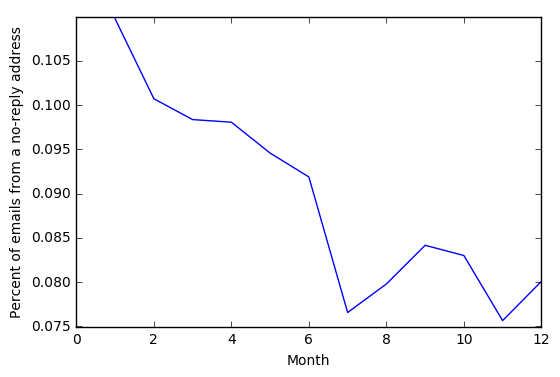

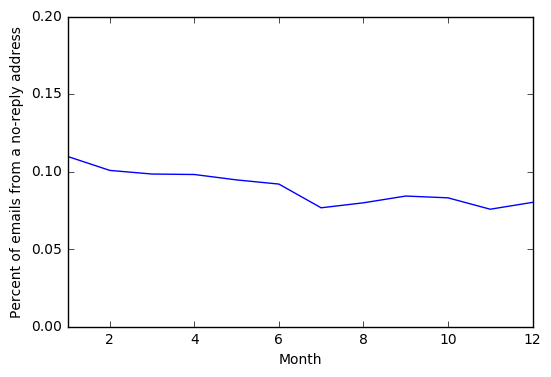

In [38]:
no_reply = df[df['from'].str.contains('no.?reply')].groupby(['month']).size()
no_reply_trend = no_reply / email_volume_by_month

no_reply_percent_change = (no_reply_trend[-1] - no_reply_trend[0]) / no_reply_trend[0]
print("\nThe use of no-reply email addresses changed by {}% in 2016".format(np.round(no_reply_percent_change * 100, decimals=2)))

plt.plot(no_reply_trend)
plt.ylabel('Percent of emails from a no-reply address')
plt.xlabel('Month')
plt.show()

plt.plot(no_reply_trend)
plt.ylabel('Percent of emails from a no-reply address')
plt.xlabel('Month')
plt.axis([1,12,0,.2])
plt.show()



Usage of no-reply email addresses decreased 27% in 2016. This decrease is illustrated by both of the above graphs. Notice how the second graph shows a much les drastic decrease. When graphing trends it's important to keep in mind the scales you're working with. The second graph also starts from Month 1, which is January.

If you're still sending emails from a no-reply address, consider using a monitored inbox (that subscribers can respond to) and see if this leads to valuable conversations.

### Question 2: Are more emails becoming mobile optimized?


The use of mobile optimized email templates changed by 35.79% in 2016


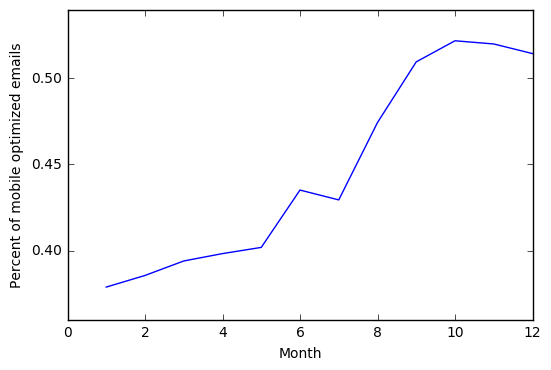

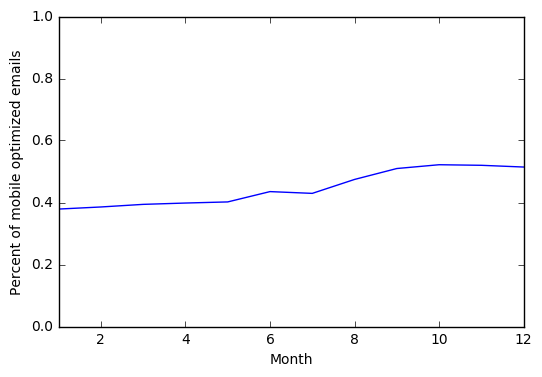

In [40]:
mobile_optimized = df[df['mobile_optimized'] == 't'].groupby(['month']).size()
mobile_optimized_trend = mobile_optimized / email_volume_by_month

mobile_optimized_percent_change = (mobile_optimized_trend[-1] - mobile_optimized_trend[0]) / mobile_optimized_trend[0]
print("\nThe use of mobile optimized email templates changed by {}% in 2016".format(np.round(mobile_optimized_percent_change * 100, decimals=2)))


plt.plot(mobile_optimized_trend)
plt.ylabel('Percent of mobile optimized emails')
plt.xlabel('Month')
plt.show()

plt.plot(mobile_optimized_trend)
plt.ylabel('Percent of mobile optimized emails')
plt.xlabel('Month')
plt.axis([1,12,0,1])
plt.show()

Consistent with our first question, the landscape is changing when it comes to how popular mobile optimized templates are becoming. This is no surprise given that over 50% of emails are opened on a mobile device.

If your email templates are not mobile optimized, this is a fantastic initiative to prioritize.

### Question 3: Are GIFs more popular in emails?


The use of animated GIFs changed by 95.06% in 2016


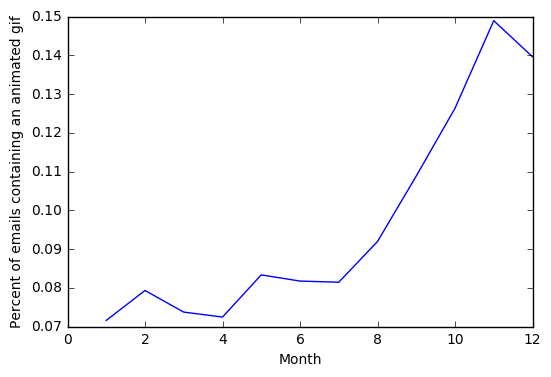

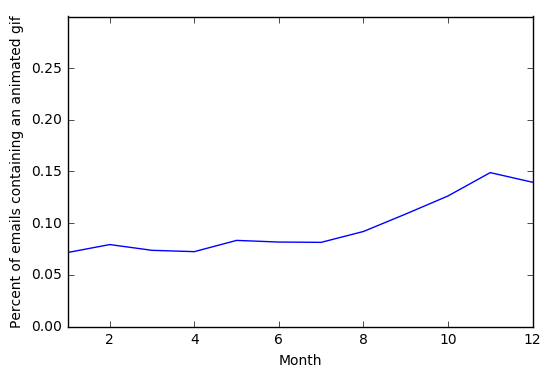

In [41]:
gif = df[df['animated'] == 't'].groupby(['month']).size()
gif_trend = gif / email_volume_by_month

gif_percent_change = (gif_trend[-1] - gif_trend[0]) / gif_trend[0]
print("\nThe use of animated GIFs changed by {}% in 2016".format(np.round(gif_percent_change * 100, decimals=2)))


plt.plot(gif_trend)
plt.ylabel('Percent of emails containing an animated gif')
plt.xlabel('Month')
plt.show()

plt.plot(gif_trend)
plt.ylabel('Percent of emails containing an animated gif')
plt.xlabel('Month')
plt.axis([1,12,0,.3])
plt.show()

It's incredible to see the popularity of animated GIFs **almost double** in a year. If you're looking for ways to become more personable and send engaging emails, consider including a fun animated GIF in your next email campaign.

## Appendix A: Further research
We've already answer the three questions we set to tackle. That being said, let's run some summary statistics to further our understanding of this dataset.

In [43]:
# Let's now look at the mean number of emails each company sent each month
mean_emails_by_month = np.round(email_volume_by_month / unique_senders_by_month, decimals=2)
print(mean_emails_by_month)

print(np.mean(mean_emails_by_month))

month
01    18.32
02    17.55
03    18.38
04    17.42
05    17.62
06    16.69
07    17.26
08    18.14
09    16.67
10    16.91
11    18.91
12    16.74
dtype: float64
17.550833333333333


It looks like mean number of emails sent by each company is 17 emails per month. This seems really high. Are some companies drastically skewing our data?

Let's do some further research...

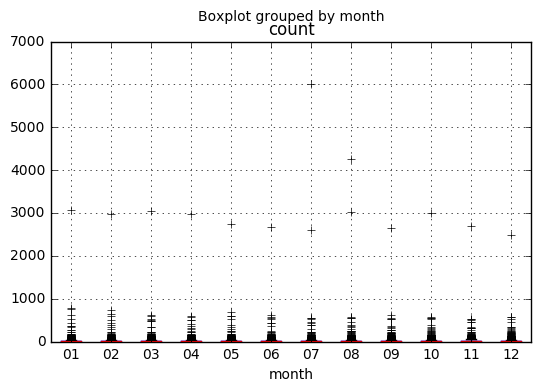

In [89]:
# Let's group our emails by month by company and get a count
company_emails_per_month = df.groupby(['month', 'company_id']).size()

# Let's now create a dataframe from this multi-index series.

month = []
company = []
email_counts = []

for mo, co in company_emails_per_month.index:
    month.append(mo)
    company.append(co)
    email_counts.append(company_emails_per_month[mo, co])
    
company_emails_per_month = pd.DataFrame({'month': month, 'company': company, 'count': email_counts})

company_emails_per_month.boxplot(column='count', by='month')
plt.show()

We can clearly see that a couple of companies send vastly more email than the others, which skews the mean and makes it difficult to see our data.

To correct for this, we drop outliers.  Note that in the following plot, the medians are shown by the red line and the means are shown by the red square. The means are dominated by a few companies that send a lot of email, however the medians show that most companies stay in a much narrower range. In this graph, the means are all near the 75th percentile for each month's counts.

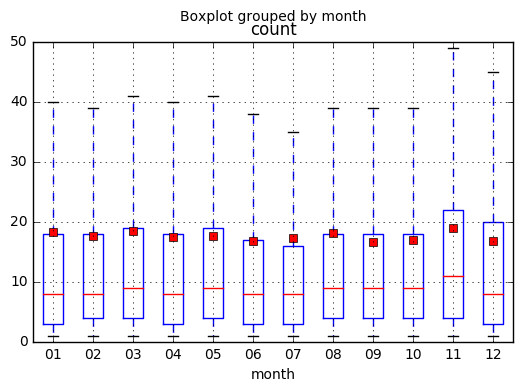

In [91]:
company_emails_per_month.boxplot(
    column='count',  # show only the count
    by='month',  # group by month
    showfliers=False,  # drop outliers from the graph
    showmeans=True  # show the means as red boxes.  The medians are shown by default.
)
plt.show()

## Appendix B: Bootcamp exploration

In future iterations, I'd like to understand if these results are statistically significant. If so, it'd be great to predict where these different trends are headed.